# <font color=blue><center>**Machine Learning supervisé avec R | Modèle de régression | Package CARET**



# <font color=red> Importation des packages et des données

La librairie [caret](https://www.rdocumentation.org/packages/caret/versions/4.47) est l'un des packages de R les plus utilisés en apprentissage automatique supervisé. C'est principalement cette librairie que nous utiliserons dans cette formation.

In [ ]:
# Packages
#install.packages('caret')
library(caret)

L'ensemble de données que nous utiliserons contient des informations sur les caractéristiques de certaines maisons dans la région de Boston. Il s’agira de construire un modèle de régression linéaire capable de prédire le prix d’une maison en fonction de certains de ses attributs.

In [ ]:
# Importation des données
boston <- read.csv("C:/Users/ACER/Desktop/Régression Linéaire/test en R/BostonHousing.csv")
head(boston)


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
dim(boston)

[1] 506  14

In [ ]:
# Structure des données
str(boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [ ]:
# Résumé statistique
summary(boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

La dataframe contient 506 lignes (chaque ligne représente une maison) et 14 variables. Pour
comprendre la signification de chaque variable, veuillez-vous reporter à la [page descriptive](https://docs.google.com/document/d/1dbxF1zLP1QkI49sezETuauwFHVccpA7gdqxwRwdN2Jw/edit?usp=sharing)
de ces données. La variable ***MEDV*** est notre variable d’intérêt. Elle indique le prix
des maisons en millier de dollars.

Apparemment, il n’y a pas de valeurs manquantes dans la dataframe. 

# <font color=red> Données d'entraînement et d'évaluation (*Train/Test*)

In [ ]:
# Mélange aléatoire des données

seed <- 123

set.seed(seed)

rows <- sample(nrow(boston))

boston_mel <- boston[rows, ]

head(boston_mel)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
415,45.74610,0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
463,6.65492,0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5
179,0.06642,0,4.05,0,0.510,6.860,74.4,2.9153,5,296,16.6,391.27,6.92,29.9
14,0.62976,0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
195,0.01439,60,2.93,0,0.401,6.604,18.8,6.2196,1,265,15.6,376.70,4.38,29.1
426,15.86030,0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3


In [ ]:
# Division en données d'entraînement (80%) et Données d'évaluation (20%)

split <- round(nrow(boston_mel) * 0.80)

# Train data

train <- boston_mel[1:split, ]

# Test data

test <- boston_mel[(split + 1):nrow(boston_mel), ]

In [ ]:
# Dimension du train data

dim(train)

[1] 405  14

In [ ]:
# Dimension du test data

dim(test)

[1] 101  14

# <font color=red> Modèle et calcul de l'erreur quadratique moyenne

# Régression Linéaire simple

In [ ]:
# Construction du modèle à partir des données d'entraînement
#régression simple
model <- lm(medv ~rm, data = train)
# Affichage du modèle
model


Call:
lm(formula = medv ~ rm, data = train)

Coefficients:
(Intercept)           rm  
    -35.185        9.193  


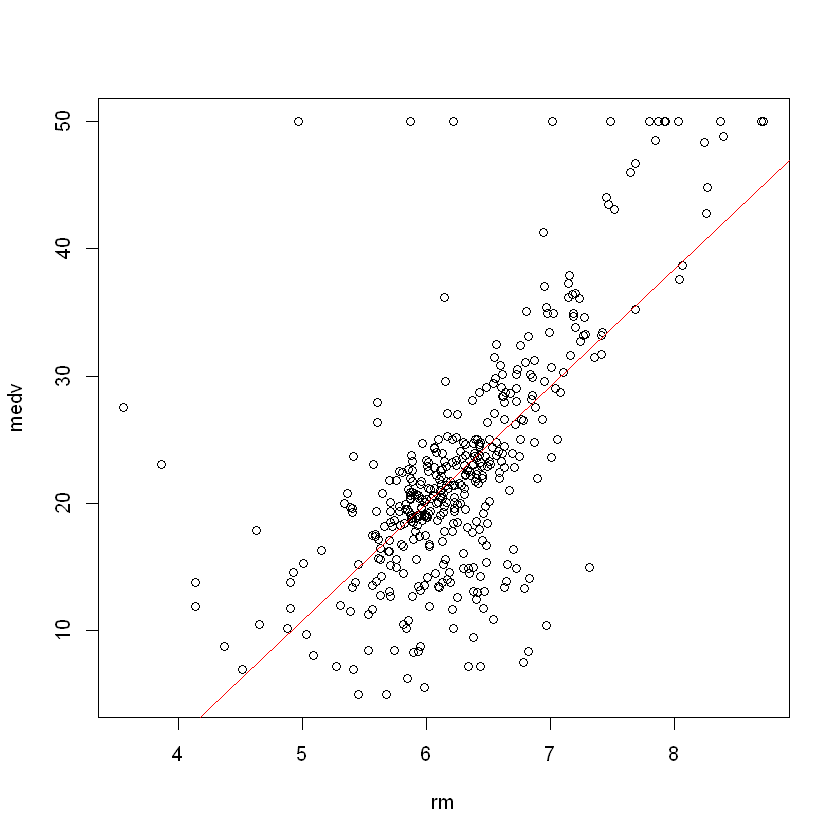

In [ ]:

plot(medv~rm,data=train)
abline(model,col="red")

Passons à l'évaluation de la performance du modèle. Il s'agit de vérifier la capacité du modèle sur des données qui n'ont pas servi à son entraînement c'est-à-dire sa capacité à se généraliser.

In [ ]:
# Création d'une Fonction d'évaluation de modèle

model_evaluation <- function (Model) {
    
    # Prédiction sur le train data
    
    preds_train <- predict(Model, train)
    
    # Prédictions sur le test data
    
    preds_test <- predict(Model, test)
    
    # Erreur sur le train data
    
    error_train <- preds_train - train[, "medv"]
    
    # Erreur sur le test data
    
    error_test <- preds_test - test[, "medv"]
    
    # RMSE sur les train data
    
    rmse_train <- sqrt(mean(error_train ^ 2))
    
    # RMSE sur le test data
    
    rmse_test <- sqrt(mean(error_test ^ 2))
    
    print(paste("RMSE sur le train data :", rmse_train))
    
    print(paste('RMSE sur le test data :', rmse_test))
}

In [ ]:
# Evaluation du modèle 'model'
model_evaluation(model)

[1] "RMSE sur le train data : 6.63596089157829"
[1] "RMSE sur le test data : 6.4724247204069"


# Régression Linéaire multiple

In [ ]:
# Construction du modèle à partir des données d'entraînement
model2 <- lm(medv ~., data = train)
# Affichage du modèle
model2


Call:
lm(formula = medv ~ ., data = train)

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  40.107503    -0.103141     0.049039     0.017708     3.105154   -18.579208  
         rm          age          dis          rad          tax      ptratio  
   3.434734     0.011500    -1.471504     0.313390    -0.011656    -0.986143  
          b        lstat  
   0.007494    -0.588722  


In [ ]:
# Evaluation du modèle 'model'
model_evaluation(model2)

[1] "RMSE sur le train data : 4.64293589760047"
[1] "RMSE sur le test data : 4.8894390354948"
